## All imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.1f' % x)

## Working with data:
###### importing apple store data:

In [2]:
apple_store = pd.read_csv("appstore/AppleStore.csv")
apple_store_desc = pd.read_csv("appstore/appleStore_description.csv")
# importing all data for AppStore 


apple_store = apple_store.drop(['id', 'Unnamed: 0'], axis=1).astype({'size_bytes': 'int64',})\
.rename({'rating_count_tot': 'rating_count_total', 'user_rating': 'rating', 'track_name': 'app'}, axis=1)

apple_store.prime_genre.replace('Book', 'Books & Reference', inplace = True)
apple_store.prime_genre.replace('Reference', 'Books & Reference', inplace = True)

##### importing and cleaning google play data:

In [3]:
google_play_store = pd.read_csv("googleplay/googleplaystore.csv")
google_play_store_reviews = pd.read_csv("googleplay/googleplaystore_user_reviews.csv")

In [4]:
# make apple store genres and google play store categories with equal names
# categories in google play store are the same thing that are genres in apple store
# so we merge some google play categories into one categorie to match them with apple store apps

google_ps = google_play_store.copy()
google_play_store['Genres'] = google_play_store['Genres'].str.split(';').str[0]

google_play_store['Genres'].replace('Music & Audio', 'Music', inplace = True)
google_play_store['Genres'].replace('Music & Video', 'Music', inplace = True)

dict_categories = {'GAME': 'Games', 'PRODUCTIVITY': 'Productivity', 'WEATHER': 'Weather', 'SHOPPING': 'Shopping', 'FINANCE': 'Finance',\
                  'TOOLS': 'Utilities', 'PERSONALIZATION': 'Utilities', 'TRAVEL_AND_LOCAL': 'Travel', 'SOCIAL': 'Social Networking', \
                   'DATING': 'Social Networking', 'COMMUNICATION': 'Social Networking', 'SPORTS': 'Sports', 'BUSINESS': 'Business',\
                  'HEALTH_AND_FITNESS': 'Health & Fitness', 'BEAUTY': 'Health & Fitness', 'ENTERTAINMENT': 'Entertainment', 'COMICS': 'Entertainment',\
                   'VIDEO_PLAYERS': 'Photo & Video', 'PHOTOGRAPHY': 'Photo & Video', 'ART_AND_DESIGN': 'Photo & Video', 'MAPS_AND_NAVIGATION': 'Navigation',\
                  'EDUCATION': 'Education', 'PARENTING': 'Education', 'LIFESTYLE': 'Lifestyle', 'EVENTS': 'Lifestyle', 'HOUSE_AND_HOME':\
                   'Lifestyle', 'AUTO_AND_VEHICLES': 'Lifestyle', 'FAMILY': 'Lifestyle', 'FOOD_AND_DRINK': 'Food & Drink', 'NEWS_AND_MAGAZINES':\
                   'News', 'MEDICAL': 'Medical', 'LIBRARIES_AND_DEMO': 'Catalogs', 'BOOKS_AND_REFERENCE': 'Books & Reference'
                  } 
for i in dict_categories.keys():
    google_play_store['Category'].replace(i, dict_categories[i], inplace = True)

In [5]:
for index in google_play_store.index:
    size = google_play_store.loc[index, 'Size']
    installs = google_play_store.loc[index, 'Installs']
    price = google_play_store.loc[index, 'Price']
    if installs.find("+") != -1:
        google_play_store.loc[index, 'Installs'] = installs[:-1].replace(",", "")
    if size.find("M") != -1:
        google_play_store.loc[index, 'Size'] = float(size[:-1]) * 125000 
        # removing "M" changing type from str to float and converting to bytes 
    elif size.find("k") != -1:
        google_play_store.loc[index, 'Size'] = float(size[:-1]) * 1000 
        # removing "k" changing type from str to float and converting to bytes 
    elif size.find('Varies') != -1:
        google_play_store.loc[index, 'Size'] = -1
    if price.find("$") != -1:
        google_play_store.loc[index, 'Price'] = price[1:]
    if google_play_store.loc[index, 'Genres'] == 'Music':
        google_play_store.loc[index, 'Category'] = 'Music'

        
google_play_store = google_play_store.astype({"Reviews": 'int32', "Rating": float, "Installs": 'int32', "Size": float, 'Price': float}).rename({'Size': 'size_bytes', 'Reviews': 'rating_count_total', 'Rating': 'rating', 'App': 'app', 'Current Ver': "ver", 'Price': 'price', 'Installs': 'installs'}, axis=1)


for index in google_ps.index:
    size = google_ps.loc[index, 'Size']
    installs = google_ps.loc[index, 'Installs']
    price = google_ps.loc[index, 'Price']
    if installs.find("+") != -1:
        google_ps.loc[index, 'Installs'] = installs[:-1].replace(",", "")
    if size.find("M") != -1:
        google_ps.loc[index, 'Size'] = float(size[:-1]) * 125000 
        # removing "M" changing type from str to float and converting to bytes 
    elif size.find("k") != -1:
        google_ps.loc[index, 'Size'] = float(size[:-1]) * 1000 
        # removing "k" changing type from str to float and converting to bytes 
    elif size.find('Varies') != -1:
        google_ps.loc[index, 'Size'] = -1
    if price.find("$") != -1:
        google_ps.loc[index, 'Price'] = price[1:]
    if google_ps.loc[index, 'Genres'] == 'Music':
        google_ps.loc[index, 'Category'] = 'Music'

        
google_ps = google_ps.astype({"Reviews": 'int32', "Rating": float, "Installs": 'int32', "Size": float, 'Price': float}).rename({'Size': 'size_bytes', 'Reviews': 'rating_count_total', 'Rating': 'rating', 'App': 'app', 'Current Ver': "ver", 'Price': 'price', 'Installs': 'installs'}, axis=1)
appstore = apple_store.copy()


# make apple store genres and google play store categories with equal names
# todo music in google play

google_ps['Genres'] = google_ps['Genres'].str.split(';').str[0]

google_ps['Genres'].replace('Music & Audio', 'Music', inplace = True)
google_ps['Genres'].replace('Music & Video', 'Music', inplace = True)


appstore.prime_genre.replace('Book', 'Books & Reference', inplace = True)
appstore.prime_genre.replace('Reference', 'Books & Reference', inplace = True)
#google_ps['Category'].replace('BOOKS_AND_REFERENCE', 'Books & Reference', inplace = True)

catgry=pd.get_dummies(google_ps['Category'],prefix='catg',drop_first=True)
frames=[google_ps,catgry]
google_ps = pd.concat(frames,axis=1)



In [6]:
google_play_store["rating"] = google_play_store["rating"].fillna(google_play_store["rating"].median())
#replacing all NaN values with median of column 'rating'

In [7]:
# all apps with price above 110 is just "i am rich" and "most expensive app" so i think we can easily remove them
google_play_store = google_play_store[google_play_store['price'] <= 80]
#google_play_store[google_play_store['price'] > 60] # uncomment and run to see all expensive apps

In [8]:
apple_store = apple_store[apple_store['price'] <= 80]
#apple_store[apple_store['price'] > 60 ] # uncomment and run to see all expensive apps

In [9]:
# top rated apps for google where amount of reviews is more than 300
google_play_top = google_play_store[(google_play_store["rating_count_total"] > 300) & (google_play_store["rating"] >= 4.9)].sort_values(by=["rating_count_total"]) 
# top rated apps for google where amount of reviews is more than 300
apple_top = apple_store[(apple_store["rating_count_total"] > 300) & (apple_store["rating"] >= 4.9)].sort_values(by=["rating_count_total"]) 


#### After cells above:
    google_play_store :
        * reviews, installs are now type:int32
        * rating, size, price are now type:float
        * size now is int and it is in bytes
        * rating - plus "+" sign removed
        * junk/scam apps like "i am rich" with price 400 removed
        
    apple_store :
        * junk/scam apps like "i am rich" with price 400 removed

#### Cell bellow is for playing with dataframes

In [40]:
%matplotlib notebook

paid_apps_apple = apple_store[(apple_store['price'] != 0.0) & apple_store['rating'] > 0.0] 
paid_apps_google = google_play_store[(google_play_store['price'] != 0.0) & google_play_store['rating'] > 0.0] 
sns.histplot(paid_apps_google.groupby("price").mean()['rating'], kde=True, color='blue')
sns.histplot(paid_apps_apple.groupby("price").mean()['rating'],
             kde=True, color='orange')


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='rating', ylabel='Count'>

In [11]:
# some apps occure in table multiple times
google_play_store[google_play_store['app'] == 'Minecraft']
sns.pairplot(
    paid_apps_google,
    x_vars=['rating', 'price', 'rating_count_total','size_bytes', 'installs'],
    y_vars=['rating', 'price', 'rating_count_total','size_bytes', 'installs'],
)

<IPython.core.display.Javascript object>

###### Dataframe with data about free and paid apps in both stores.
It is hard to compare free and paid apps between two stores, because Google Play Store has much less paid apps, than Apple Store.

So we compare percentage between paid and free apps inside Apple Store:

* the highest percentage of free apps has categorie 'Shopping'
* the highest percentage of paid apps has categorie 'Education'
* almost equal percentage of paid and free apps are in categories: 'Books & Reference', 'Music' and 'Photo & Video'.

The only noticeable precentage of paid apps in Google Play Store is categorie 'Medical'.

So, there is much bigger chance that Apple Store user pays money for the apps, simply because he has much more paid apps than Google Play Store user to choose from.

In [12]:
comp_apple  = apple_store.prime_genre.value_counts().to_frame(name = 'apple').sort_index()
comp_free_apple  = apple_store[apple_store['price'] == 0].prime_genre.value_counts().to_frame(name = 'free_apple').sort_index()
comp_paid_apple = apple_store[apple_store['price'] != 0].prime_genre.value_counts().to_frame(name =  'paid_apple').sort_index()
comp_google = google_play_store['Category'].value_counts().to_frame(name =  'google').sort_index()
comp_free_google = google_play_store[google_play_store['Type'] == 'Free'].Category.value_counts().to_frame(name =  'free_google').sort_index()
comp_paid_google = google_play_store[google_play_store['Type'] == 'Paid'].Category.value_counts().to_frame(name =  'paid_google').sort_index()

comparison = comp_apple.join(comp_free_apple).join(comp_paid_apple).join(comp_google).join(comp_free_google).join(comp_paid_google)


comparison.columns = ['Total Apple', 'Free Apple','Paid Apple','Total Google', 'Free Google','Paid Google']

comparison['Paid Apple%'] = comparison['Paid Apple'] * 100/comparison['Total Apple']
comparison['Free Apple%'] = comparison['Free Apple'] * 100/comparison['Total Apple']
comparison['Paid Google%'] = comparison['Paid Google']*100/comparison['Total Google']
comparison['Free Google%'] = comparison['Free Google'] * 100/comparison['Total Google']

comparison = comparison[['Total Apple','Free Apple', 'Paid Apple','Free Apple%', 'Paid Apple%', 'Total Google','Free Google', 'Paid Google','Free Google%', 'Paid Google%']]
comparison


,Total Apple,Free Apple,Paid Apple,Free Apple%,Paid Apple%,Total Google,Free Google,Paid Google,Free Google%,Paid Google%
Books & Reference,176,86,90,48.9,51.1,231,203,28,87.9,12.1
Business,57,20,37,35.1,64.9,459,446,13,97.2,2.8
Catalogs,10,9,1,90.0,10.0,85,84,1,98.8,1.2
Education,451,132,319,29.3,70.7,216,210,6,97.2,2.8
Entertainment,535,334,201,62.4,37.6,209,207,2,99.0,1.0
Finance,104,84,20,80.8,19.2,359,349,10,97.2,2.8
Food & Drink,63,43,20,68.3,31.7,127,125,2,98.4,1.6
Games,3862,2257,1605,58.4,41.6,1122,1040,82,92.7,7.3
Health & Fitness,180,76,104,42.2,57.8,394,378,16,95.9,4.1
Lifestyle,144,94,50,65.3,34.7,2576,2373,202,92.1,7.8


###### Data visualization about free/paid app distribution in Apple Store.

In [13]:
#https://www.kaggle.com/shekhart47/appstore-analysis
#plot idea

plt.figure(figsize =(8,10))
free_apple_tuple = tuple(comparison['Free Apple%'].sort_index().tolist())
paid_apple_tuple = tuple(comparison['Paid Apple%'].sort_index().tolist())

n = np.arange(22)    # the x locations for the groups
width = 0.9      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(n, free_apple_tuple, width,color  ='#005fba')
p2 = plt.bar(n, paid_apple_tuple, width,
             bottom=free_apple_tuple, color = '#52c4da')

plt.ylabel('Percentage')
plt.title('Free/Paid distribution in Apple Store')
plt.xticks(rotation=90)
plt.xticks(n, ('Books&Ref', 'Business', 'Catalogs', 'Education', 'Entertainment',
                'Finance', 'Food & Drink', 'Games', 'Health&Fit', 'Lifestyle', 'Medical',
                'Music', 'Navigation', 'News', 'Photo & Video', 'Productivity', 'Shopping', 'Social',
                'Sports', 'Travel', 'Utilities', 'Weather'))
plt.legend((p1[0], p2[0]), ('Free Apple', 'Paid Apple'))


plt.show()

<IPython.core.display.Javascript object>

###### Visualization data about free/paid app distribution in Apple Store.

In [14]:
#https://www.kaggle.com/shekhart47/appstore-analysis
#plot idea from here

plt.figure(figsize =(8,10))
free_google_tuple = tuple(comparison['Free Google%'].sort_index().tolist())
paid_google_tuple = tuple(comparison['Paid Google%'].sort_index().tolist())

n = np.arange(22)    # the x locations for the groups
width = 0.9      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(n, free_google_tuple, width,color  = '#005fba')
p2 = plt.bar(n, paid_google_tuple, width,
             bottom=free_google_tuple, color = '#52c4da')

plt.ylabel('Percentage')
plt.title('Free/Paid distribution in Google Play Store')
plt.xticks(rotation=90)
plt.xticks(n, ('Books&Ref', 'Business', 'Catalogs', 'Education', 'Entertainment',
                'Finance', 'Food & Drink', 'Games', 'Health&Fit', 'Lifestyle', 'Medical',
                'Music', 'Navigation', 'News', 'Photo & Video', 'Productivity', 'Shopping', 'Social',
                'Sports', 'Travel', 'Utilities', 'Weather'))
plt.legend((p1[0], p2[0]), ('Free Google', 'Paid Google'))


plt.show()

<IPython.core.display.Javascript object>

In [15]:
#idea for plot function and visualization
#https://www.kaggle.com/rj1993/appstore-apps-analysis-and-insights

def annot_plot(ax,w,h):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

###### Data visualization about rating distribution in Apple Store.
Most apps in Apple Store are between 4.25-4.74 rating.

In [16]:
plt.figure(figsize=(8,8))
ax=sns.countplot('rating',data=apple_store,palette="Blues")
plt.title('Rating distribution in Apple Store')
plt.xlabel('User Rating')
plt.ylabel('App count')
annot_plot(ax,0.1,20)

<IPython.core.display.Javascript object>

/Users/sndvsk/.conda/envs/Kaggle-Mobile-Apps/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


###### Data visualization about rating distribution in Google Play Store.
Most apps in Google Play Store are between 4.25-4.34 rating.

In [17]:
plt.figure(figsize=(11,8))
ax=sns.countplot('rating',data=google_play_store,palette="Blues")
plt.xticks(rotation=90)
plt.title('Rating distribution in Google Play Store')
plt.xlabel('User Rating')
plt.ylabel('App count')
annot_plot(ax,0,20)

<IPython.core.display.Javascript object>

/Users/sndvsk/.conda/envs/Kaggle-Mobile-Apps/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


### Compare data visualization about rating distribution between Apple Store and Google Play Store.
Because there are more apps in Google Play Store and both shops have different rating system, plots are with different steps. 

If we sum apps with rating between 4.26 - 4.74 in Google Play Store we get 6010 apps, which is 55,5% of total number of the apps.

App store has 2662 apps between 4.26 - 4.74, which is 37% of total number of the apps.

The difference between rating distribution is quite noticable.

###### Data visualization about category distribution in Apple Store.
Categories with most apps are: 'Games', 'Enterntainment' and 'Education'.

In [18]:
plt.figure(figsize=(11,8))
ax=sns.countplot('prime_genre',data=apple_store,palette="ch:start=.2,rot=-.3",order=apple_store['prime_genre'].value_counts().index)
plt.title('Category distribution in Apple Store')
plt.xlabel('Categories')
plt.ylabel('App count')
plt.xticks(rotation=80)
annot_plot(ax,0,20)

<IPython.core.display.Javascript object>

/Users/sndvsk/.conda/envs/Kaggle-Mobile-Apps/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


###### Data visualization about category distribution in Google Play Store.
Categories with most apps are: 'Lifestyle', 'Utilities' and 'Games'.

In [19]:
plt.figure(figsize=(8,8))
ax=sns.countplot('Category',data=google_play_store,palette="ch:start=.2,rot=-.3",order=google_play_store['Category'].value_counts().index)
plt.title('Category distribution in Google Play Store')
plt.xlabel('Categories')
plt.ylabel('App count')
plt.xticks(rotation=80)
annot_plot(ax,0.03,1)

<IPython.core.display.Javascript object>

/Users/sndvsk/.conda/envs/Kaggle-Mobile-Apps/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


###### Compare data visualization about category distribution between Apple Store and Google Play Store.
As the visualization shows, there are major differencec between distribution of categories between two shops.

Both stores have 'Games' in their top 3 categories, but in Apple Store 'Games' categorie app count is 3(!) times higher, than in Google Play Store.

###### Comparing Free/Paid apps by category via rating in Apple Store.
Best free categories by distribution are: 'Shopping', 'Games' and 'Photo & Video'.

Despite having good distribution at 5s and 4s 'Travel', 'Finance', 'Sports', 'Catalogs', 'Lifestyle', 'Navigation' and 'Books & Reference' categories have also high percent of low rated apps, so they are not the best free categories.

Best paid categories by distribution are: 'Medical', 'Health & Fitness' and 'Photo & Video'.

Similar with free apps, some categories have high percent of low rated apps despite being good at the high rating too, such as: 'Navigation', 'Utilities' and 'Books & Reference'.

Between best free and best paid categories there are best categorie: 'Photo & Video'.

Also, some categories have similar patterns between them, such as: 'Navigation', 'Games', 'Photo & Video'.

In [20]:
l = apple_store.prime_genre.value_counts().index[:22]

def catag(x):
    if x in l:
        return x
    else:
        return "Other"
    
    
apple_store['broad_genre'] = apple_store.prime_genre.apply(lambda x: catag(x))

free  = apple_store[apple_store['price'] == 0].broad_genre.value_counts().to_frame(name = 'free').sort_index()
paid = apple_store[apple_store['price']!= 0].broad_genre.value_counts().to_frame(name =  'paid').sort_index()

def check(x):
    if(x == 0):
        return "free"
    else:
        return "paid"

apple_store['Status'] = pd.DataFrame(apple_store.price.apply(lambda x : check(x)))


plt.figure(figsize = (20,15))
plt.ylim(0,5)
sns.violinplot(data = apple_store, y = 'rating', x = 'broad_genre', hue = 'Status', split = True, scale = 'count', palette= ['#005fba','#52c4da'] )
plt.style.use("fast")
plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('User Rating')
plt.title('Free/Paid User Rating Distribution in Apple Store')
plt.show()

<IPython.core.display.Javascript object>

###### Comparing Free/Paid apps by category via rating in Google Play Store.
Sadly, there are little information about paid apps in Google Play Store.

Nevertheless, if we look at the exsisting data, we can see which categories have the best rating by distribution.

They are: 'Books & Refence', 'Health & Fitness' and 'Education'.

In [21]:
l2 = google_play_store.Category.value_counts().index[:22]

def catag(x):
    if x in l2:
        return x
    else:
        return "Other"
    
    
google_play_store['broad_genre'] = google_play_store.Category.apply(lambda x: catag(x))

free  = google_play_store[google_play_store['price'] == 0.0].broad_genre.value_counts().to_frame(name = 'free').sort_index()
paid = google_play_store[google_play_store['price']!= 0.0].broad_genre.value_counts().to_frame(name =  'paid').sort_index()

def check(x):
    if(x == 0):
        return "paid"
    else:
        return "free"

google_play_store['Status'] = pd.DataFrame(google_play_store.price.apply(lambda x : check(x)))


plt.figure(figsize = (20,15))
plt.ylim(0,5)
sns.violinplot(data = google_play_store, y = 'rating', x = 'broad_genre', hue = 'Status', split = True, scale = 'count', palette= ['#005fba','#52c4da'] )
plt.style.use("fast")
plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('User Rating')
plt.title('Free/Paid User Rating Distribution in Google Play Store')
plt.show()

<IPython.core.display.Javascript object>

###### Compare Free/Paid apps by category via rating between Apple Store and Google Play Store.
We can not really compare them, because there is lack of data in Google Play Store paid apps.

###### Finding apps with equal names in both stores
Here we find indexes for apps with equal names in both dataframes.

Since len(apple_store) is 7194 and len(google_play) is 10820 we get around 78 000 000 iterations.

After processing this algorithm for one hour, we got 204 equal apps.

If we look at google_id list, we can see, that indexes there are increasing, stating that 2037 index was last processed index.

(2037/10820)*100 = around 18,8% of the all possible apps were found.

204/0,188 = there are around 1085 apps with equal names (probably)

In [22]:
#uncomment under to find similar indexes
#very long algorithm
#can be optimised, but will take long time anyway

#idx_list_apple = []
#idx_list_google = []
#for i in range(len(google_play_store)):
#    for j in range(len(apple_store)):
#        if google_play_store.iloc[i].app == apple_store.iloc[j].app:
#            idx_list_apple.append(j)
#            idx_list_google.append(i)
#            


#apple_store.iloc[0].app
#google_play_store.iloc[0].app


In [23]:
# indexes of apple apps that are equal to respective indexes in google_id list for google play apps in terms on names

#apple_store.iloc[apple_id[i]].app == google_play_store.iloc[google_id[i]].app

#idx_list_apple 
apple_id = [6765,122,6474,853,124,1947,4661,678,1008,695,124,1947,678,541,4661,1008,621,1947,678,431,799,431,431,
            3045,448,3045,1486,3045,1486,3710,357,3139,1867,1440,1188,112,357,1473,1772,1132,2543,3802,357,1473,
            1772,1132,1480,717,2543,357,1772,1473,1132,259,3802,717,2543,1772,112,2042,129,135,129,346,80,405,
            3019,1114,208,809,2617,69,537,809,2225,1114,952,1983,290,290,199,1983,1731,774,1245,1491,342,5651,
            4610,1611,1628,707,1674,2567,1345,47,1326,2052,1347,4490,1558,2552,1822,6076,2899,1245,774,1628,1345,
            1491,2207,2557,2899,2742,2567,2052,4610,2020,707,2552,1611,1347,1822,5651,1456,6764,1326,774,1245,1491,
            5651,1387,1611,5726,1991,4710,2016,6197,6102,774,1491,2678,3744,970,2797,5089,2578,5292,1491,774,1245,
            2567,2742,4610,1345,1822,1628,1611,1326,2899,5651,2207,2052,2557,2552,2020,1558,1347,109,1245,1611,5651,
            2552,2218,2750,4484,3193,2170,3285,3800,6131,3428,2932,2454,1491,342,1456,1558,2750,1326,2552,707,4490,
            1387,6764,2218,2557,924,1347,1822,3139,774,342,3205
           ]

#print(len(apple_id))
#appstore.iloc[apple_id[0]].app

In [24]:
#idx_list_google
google_id = [7,188,189,190,336,341,358,365,372,376,381,386,390,404,408,414,427,464,469,700,714,739,783,791,820,824,825,
             842,843,853,855,859,879,886,897,899,904,914,917,921,922,926,931,934,937,940,945,949,951,958,963,964,972,
             973,979,980,983,992,993,995,1073,1162,1168,1170,1171,1173,1176,1195,1197,1199,1206,1226,1228,1242,1248,
             1249,1275,1325,1327,1347,1364,1374,1583,1653,1654,1655,1656,1659,1660,1661,1662,1665,1667,1668,1670,1673,
             1681,1683,1685,1688,1689,1693,1695,1696,1697,1700,1701,1702,1704,1705,1707,1709,1710,1712,1716,1717,1721,
             1722,1726,1727,1729,1730,1733,1735,1742,1743,1744,1748,1750,1751,1757,1758,1759,1764,1781,1783,1786,1831,
             1836,1841,1842,1843,1845,1848,1851,1853,1861,1862,1869,1870,1872,1873,1877,1878,1879,1880,1885,1886,1887,
             1890,1891,1892,1895,1897,1898,1908,1909,1914,1916,1917,1920,1921,1924,1926,1927,1930,1931,1932,1933,1947,
             1953,1956,1959,1962,1966,1973,1976,1977,1978,1981,1982,1984,1985,1988,1992,1996,2004,2007,2008,2011,2014,
             2016,2024,2037]

#print(len(google_id))
#google_ps.iloc[google_id[0]].app

In [25]:
#data prep
def impute_median(series):
    return series.fillna(series.median())
#print(google_ps.isnull().sum())

gps = google_ps.copy()
gps.dropna(thresh=len(gps)*0.1,axis=1,inplace=True)
# Now imputing the categorical values
gps.Type.fillna(str(gps.Type.mode().values[0]),inplace=True)
gps.ver.fillna(str(gps.ver.mode().values[0]), inplace=True)
gps["Android Ver"].fillna(str(gps["Android Ver"].mode().values[0]),inplace=True)
gps.Genres.fillna(str(gps.Genres.mode().values[0]), inplace=True)
gps = gps.dropna()


gps.isnull().sum()

app                         0
Category                    0
rating                      0
rating_count_total          0
size_bytes                  0
installs                    0
Type                        0
price                       0
Content Rating              0
Genres                      0
Last Updated                0
ver                         0
Android Ver                 0
catg_AUTO_AND_VEHICLES      0
catg_BEAUTY                 0
catg_BOOKS_AND_REFERENCE    0
catg_BUSINESS               0
catg_COMICS                 0
catg_COMMUNICATION          0
catg_DATING                 0
catg_EDUCATION              0
catg_ENTERTAINMENT          0
catg_EVENTS                 0
catg_FAMILY                 0
catg_FINANCE                0
catg_FOOD_AND_DRINK         0
catg_GAME                   0
catg_HEALTH_AND_FITNESS     0
catg_HOUSE_AND_HOME         0
catg_LIBRARIES_AND_DEMO     0
catg_LIFESTYLE              0
catg_MAPS_AND_NAVIGATION    0
catg_MEDICAL                0
catg_Music

In [26]:
as_copy = apple_store.copy()
apple_store.isnull().sum()

app                   0
size_bytes            0
currency              0
price                 0
rating_count_total    0
rating_count_ver      0
rating                0
user_rating_ver       0
ver                   0
cont_rating           0
prime_genre           0
sup_devices.num       0
ipadSc_urls.num       0
lang.num              0
vpp_lic               0
broad_genre           0
Status                0
dtype: int64

In [27]:
#TODO
# create train & test data
# Google :By genre/category and price predict reiting and install count
# Appstore 


from sklearn.model_selection import train_test_split
#categories = sorted(google_ps['Category'].unique())
#dictOfWords = { categories[i] : i for i in range(len(categories) ) }
#reverseDict = { i : categories[i] for i in range(len(categories) ) }

#for each in range(len(gps['Category'])):
#    gps.Category.iloc[each] = dictOfWords.get(gps.Category.iloc[each])
    

like = gps.copy()
like.drop(['app','Genres','Last Updated','ver','Android Ver','Type','Category', 'Content Rating'],axis=1,inplace=True)
print(like.columns)
X = like
y = gps.rating
z = gps.installs
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=0)
x_train, x_test, z_train, z_test = train_test_split(X,z,test_size=0.30, random_state=0) 

Index(['rating', 'rating_count_total', 'size_bytes', 'installs', 'price',
       'catg_AUTO_AND_VEHICLES', 'catg_BEAUTY', 'catg_BOOKS_AND_REFERENCE',
       'catg_BUSINESS', 'catg_COMICS', 'catg_COMMUNICATION', 'catg_DATING',
       'catg_EDUCATION', 'catg_ENTERTAINMENT', 'catg_EVENTS', 'catg_FAMILY',
       'catg_FINANCE', 'catg_FOOD_AND_DRINK', 'catg_GAME',
       'catg_HEALTH_AND_FITNESS', 'catg_HOUSE_AND_HOME',
       'catg_LIBRARIES_AND_DEMO', 'catg_LIFESTYLE', 'catg_MAPS_AND_NAVIGATION',
       'catg_MEDICAL', 'catg_Music', 'catg_NEWS_AND_MAGAZINES',
       'catg_PARENTING', 'catg_PERSONALIZATION', 'catg_PHOTOGRAPHY',
       'catg_PRODUCTIVITY', 'catg_SHOPPING', 'catg_SOCIAL', 'catg_SPORTS',
       'catg_TOOLS', 'catg_TRAVEL_AND_LOCAL', 'catg_VIDEO_PLAYERS',
       'catg_WEATHER'],
      dtype='object')


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()


y_train_encoded = lab_enc.fit_transform(y_train)
z_train_encoded = lab_enc.fit_transform(z_train)
y_test_encoded = lab_enc.fit_transform(y_test)
z_test_encoded = lab_enc.fit_transform(z_test)

lr_model = LogisticRegression(max_iter=1000000).fit(X_train, y_train_encoded)
lr_mode = LogisticRegression(max_iter=1000000).fit(x_train, z_train_encoded)
predR = lr_model.predict(X_test)
predI = lr_mode.predict(x_test)

accRLogisticRegression = accuracy_score(y_test_encoded,predR)
print(accRLogisticRegression)
accILogisticRageression = accuracy_score(z_test_encoded,predI)
print(accILogisticRageression)

print("RMSE:", np.sqrt(mean_squared_error(y_test_encoded, predR)))
print("RMSE:", np.sqrt(mean_squared_error(z_test_encoded, predI)))


0.049448594806118816
0.056207755247242974
RMSE: 7.2716757268322025
RMSE: 3.1882700344980157


/Users/sndvsk/.conda/envs/Kaggle-Mobile-Apps/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
genres = sorted(apple_store.prime_genre.unique())
dictOfWords = { genres[i] : i for i in range(len(genres) ) }
reverseDict = { i : genres[i] for i in range(len(genres) ) }

as_copy = appstore.copy()
for each in range(len(as_copy.prime_genre)):
    as_copy.prime_genre.iloc[each] = dictOfWords.get(as_copy.prime_genre.iloc[each])

aX = as_copy[['prime_genre', 'price']]
ay = as_copy.rating_count_ver
aX_train, aX_test, ay_train, ay_test = train_test_split(aX,ay,test_size=0.30, random_state=0)
print(ay_test.size)

/Users/sndvsk/.conda/envs/Kaggle-Mobile-Apps/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


2160


In [30]:
alab_enc = preprocessing.LabelEncoder()

ay_train_encoded = alab_enc.fit_transform(ay_train)
ay_test_encoded = alab_enc.fit_transform(ay_test)

alr_model = SGDClassifier(max_iter=10000).fit(aX_train, ay_train_encoded)
apredR = alr_model.predict(aX_test)
#apredI = lr_mode.predict(aX_test)

accSGD = accuracy_score(ay_test_encoded,apredR)
#accI = accuracy_score(z_test_encoded,apredI)
print("Rating accuracy: ", accSGD)
#print("Install accuracy: ", accI)
print("RMSE:", np.sqrt(mean_squared_error(ay_test, apredR)))
#print("RMSE:", np.sqrt(mean_squared_error(z_test_encoded, apredI)))


Rating accuracy:  0.16666666666666666
RMSE: 3774.717425529041


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


X = like
y = gps.rating
z = gps.installs
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=0)
x_train, x_test, z_train, z_test = train_test_split(X,z,test_size=0.30, random_state=0) 

y_train_encoded = lab_enc.fit_transform(y_train)
z_train_encoded = lab_enc.fit_transform(z_train)
y_test_encoded = lab_enc.fit_transform(y_test)
z_test_encoded = lab_enc.fit_transform(z_test)

model = DecisionTreeClassifier(criterion="entropy", random_state=0, min_samples_leaf = 10).fit(X_train, y_train_encoded)
mode = DecisionTreeClassifier(criterion="entropy", random_state=0, min_samples_leaf = 10).fit(x_train, z_train_encoded)
predR = model.predict(X_test)
predI = mode.predict(x_test)

accRDesision = accuracy_score(y_test_encoded,predR)
print(accRDesision)
accIDesision = accuracy_score(z_test_encoded,predI)
print(accIDesision)

print("RMSE:", np.sqrt(mean_squared_error(y_test_encoded, predR)))
print("RMSE:", np.sqrt(mean_squared_error(z_test_encoded, predI)))



0.0017787264318747777
0.0
RMSE: 3.0045027278677074
RMSE: 1.0


In [32]:
aX = as_copy[['prime_genre', 'price']]
ay = as_copy.rating_count_ver
aX_train, aX_test, ay_train, ay_test = train_test_split(aX,ay,test_size=0.30, random_state=0)

alab_enc = preprocessing.LabelEncoder()

ay_train_encoded = alab_enc.fit_transform(ay_train)
ay_test_encoded = alab_enc.fit_transform(ay_test)

alr_model = DecisionTreeClassifier(criterion="entropy", random_state=0, min_samples_leaf = 10).fit(aX_train, ay_train_encoded)
apredR = alr_model.predict(aX_test)
#apredI = lr_mode.predict(ax_test)

accDesision = accuracy_score(ay_test_encoded,apredR)
#accI = accuracy_score(z_test_encoded,apredI)
print("Rating accuracy: ", accDesision)
#print("Install accuracy: ", accI)
print("RMSE:", np.sqrt(mean_squared_error(ay_test_encoded, apredR)))
#print("RMSE:", np.sqrt(mean_squared_error(z_test_encoded, apredI)))

Rating accuracy:  0.1884259259259259
RMSE: 165.67464070905382


In [33]:

aX = as_copy[['prime_genre', 'price', 'lang.num', 'sup_devices.num','size_bytes', 'rating_count_total' ]]
ay = as_copy.rating_count_ver
aX_train, aX_test, ay_train, ay_test = train_test_split(aX,ay,test_size=0.30, random_state=0)

alab_enc = preprocessing.LabelEncoder()

ay_train_encoded = alab_enc.fit_transform(ay_train)
ay_test_encoded = alab_enc.fit_transform(ay_test)

alr_model = DecisionTreeClassifier(criterion="entropy", random_state=0, min_samples_leaf = 10).fit(aX_train, ay_train_encoded)
apredR = alr_model.predict(aX_test)
#apredI = lr_mode.predict(aX_test)

accDesisionFull = accuracy_score(ay_test,apredR)
#accI = accuracy_score(z_test_encoded,apredI)
print("Rating accuracy: ", accDesisionFull)
#print("Install accuracy: ", accI)
print("RMSE:", np.sqrt(mean_squared_error(ay_test_encoded, apredR)))
#print("RMSE:", np.sqrt(mean_squared_error(z_test_encoded, apredI)))

Rating accuracy:  0.2023148148148148
RMSE: 151.79968983279687


In [34]:

aX = as_copy[['prime_genre', 'price']]
ay = as_copy.rating_count_ver
aX_train, aX_test, ay_train, ay_test = train_test_split(aX,ay,random_state=42)

alab_enc = preprocessing.LabelEncoder()

ay_train_encoded = alab_enc.fit_transform(ay_train)
ay_test_encoded = alab_enc.fit_transform(ay_test)

alr_model =  RandomForestClassifier().fit(aX_train, ay_train_encoded)
apredR = alr_model.predict(aX_test)
#apredI = lr_mode.predict(aX_test)

accRandomForest = accuracy_score(ay_test,apredR)
#accI = accuracy_score(z_test_encoded,apredI)
print("Rating accuracy: ", accRandomForest)
#print("Install accuracy: ", accI)
print("RMSE:", np.sqrt(mean_squared_error(ay_test_encoded, apredR)))
#print("RMSE:", np.sqrt(mean_squared_error(z_test_encoded, apredI)))

Rating accuracy:  0.19555555555555557
RMSE: 161.08050092353753


In [35]:

aX = as_copy[['prime_genre', 'price', 'lang.num', 'sup_devices.num','size_bytes', 'rating_count_total' ]]
ay = as_copy.rating_count_ver
aX_train, aX_test, ay_train, ay_test = train_test_split(aX,ay,random_state=42)

alab_enc = preprocessing.LabelEncoder()

ay_train_encoded = alab_enc.fit_transform(ay_train)
ay_test_encoded = alab_enc.fit_transform(ay_test)

alr_model = RandomForestClassifier().fit(aX_train, ay_train)
apredR = alr_model.predict(aX_test)
#apredI = lr_mode.predict(aX_test)

accRRandomForest = accuracy_score(ay_test,apredR)
#accI = accuracy_score(z_test_encoded,apredI)
print("Rating accuracy: ", accRRandomForest)
#print("Install accuracy: ", accI)
print("RMSE:", np.sqrt(mean_squared_error(ay_test, apredR)))
#print("RMSE:", np.sqrt(mean_squared_error(z_test_encoded, apredI)))

Rating accuracy:  0.20666666666666667
RMSE: 6397.456284163088


In [36]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()



X = like
y = gps.rating
z = gps.installs
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=0)
x_train, x_test, z_train, z_test = train_test_split(X,z,test_size=0.30, random_state=0) 

y_train_encoded = lab_enc.fit_transform(y_train)
z_train_encoded = lab_enc.fit_transform(z_train)

X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

model = SVC(random_state=1989).fit(X_train, y_train_encoded)
mode = SVC(random_state=1989).fit(x_train, z_train_encoded)
predR = model.predict(X_test)
predI = mode.predict(x_test)

accRSVC = accuracy_score(y_test_encoded,predR)
print(accRSVC)
accISVC = accuracy_score(z_test_encoded,predI)
print(accISVC)

print("RMSE:", np.sqrt(mean_squared_error(y_test_encoded, predR)))
print("RMSE:", np.sqrt(mean_squared_error(z_test_encoded, predI)))


aX = as_copy[['prime_genre', 'price', 'lang.num', 'sup_devices.num','size_bytes', 'rating_count_total' ]]
ay = as_copy.rating_count_ver
aX_train, aX_test, ay_train, ay_test = train_test_split(aX,ay,random_state=42)

alab_enc = preprocessing.LabelEncoder()

ay_train_encoded = alab_enc.fit_transform(ay_train)
ay_test_encoded = alab_enc.fit_transform(ay_test)

alr_model = SVC(random_state=1989).fit(aX_train, ay_train_encoded)
apredSVC = alr_model.predict(aX_test)
#apredI = lr_mode.predict(aX_test)

accSVC = accuracy_score(ay_test_encoded,apredR)
#accI = accuracy_score(z_test_encoded,apredI)
print("Rating accuracy: ", accSVC)
#print("Install accuracy: ", accI)
print("RMSE:", np.sqrt(mean_squared_error(ay_test_encoded, apredR)))
#print("RMSE:", np.sqrt(mean_squared_error(z_test_encoded, apredI)))


0.022767698327997153
0.0
RMSE: 4.203596569549749
RMSE: 4.043211983657094
Rating accuracy:  0.2061111111111111
RMSE: 5627.612910955724


Text(0.5, 1.0, 'Google PlayStore Rating Model Accracy')

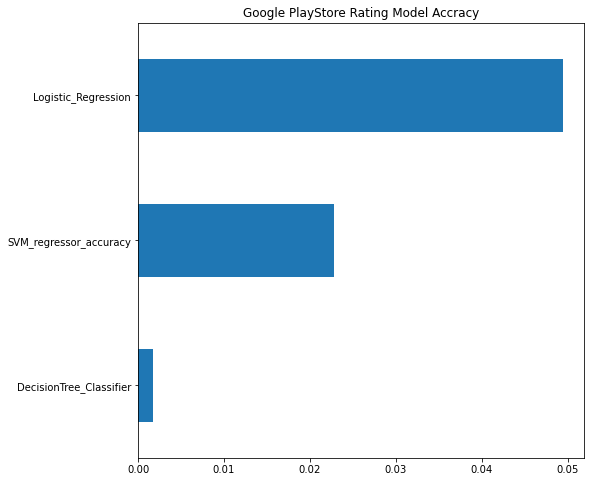

In [37]:
%matplotlib inline
model_accuracy = pd.Series(data=[accRLogisticRegression,accRDesision,accRSVC], 
        index=['Logistic_Regression','DecisionTree_Classifier','SVM_regressor_accuracy'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Google PlayStore Rating Model Accuracy')

Text(0.5, 1.0, 'Google PlayStore Install Model Accracy')

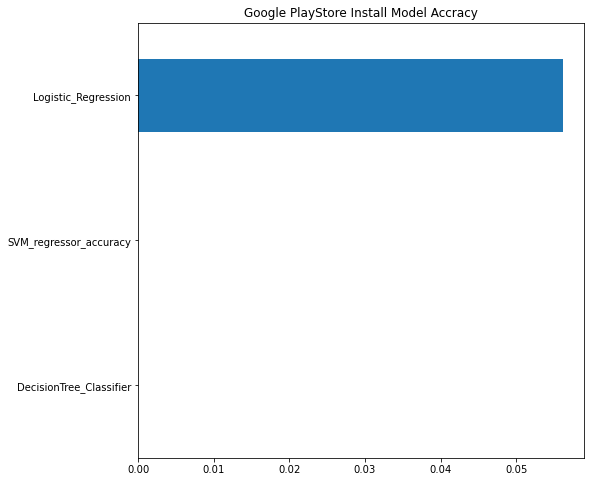

In [38]:
%matplotlib inline
model_accuracy = pd.Series(data=[accILogisticRageression,accIDesision,accISVC], 
        index=['Logistic_Regression','DecisionTree_Classifier','SVM_regressor_accuracy'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Google PlayStore Install Model Accuracy')

Text(0.5, 1.0, 'AppleStore Rating Model Accracy')

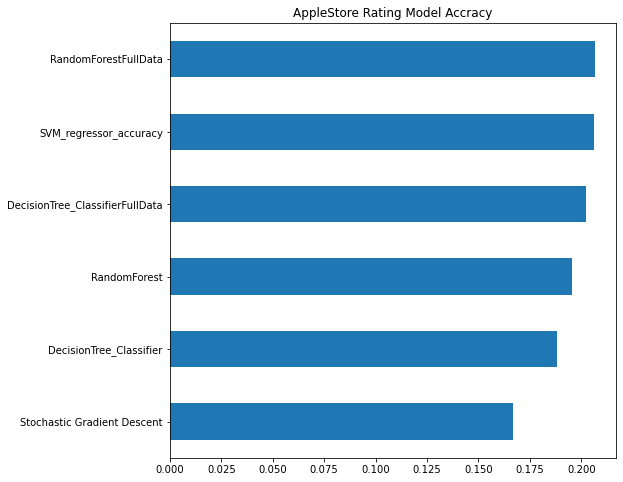

In [39]:
%matplotlib inline
model_accuracy = pd.Series(data=[accSGD,accDesisionFull,accDesision,accSVC, accRRandomForest,accRandomForest], 
        index=['Stochastic Gradient Descent','DecisionTree_ClassifierFullData','DecisionTree_Classifier','SVM_regressor_accuracy','RandomForestFullData', 'RandomForest'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('AppleStore Rating Model Accuracy')